### Step 1: Import Required Libraries
In this step, we import essential Python libraries for:

- Data handling (pandas, numpy)
- Visualization (matplotlib, seaborn)
- Machine learning (sklearn)

These tools allow us to clean the data, explore patterns, build predictive models, and interpret feature importance.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For better plot style
sns.set(style="whitegrid")

### Step 2: Load the Churn Dataset
We load the **Churn Modelling Dataset** using pandas.  
After loading, we display the first rows to understand the structure and column names.

In [24]:
# Load dataset (update path if needed)
data = pd.read_csv(r"C:\Users\Salman\Downloads\Churn_Modelling.csv")

# Display first 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Step 3: Understanding Dataset Structure
We check:

- Number of rows and columns  
- Feature names  
- Missing values  
- Basic statistics  

This helps identify what preprocessing steps are needed.

In [25]:
print("Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nMissing Values:\n", data.isnull().sum())
data.describe()

Shape: (10000, 14)

Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Step 4: Selecting Useful Features
The dataset contains ID-related and irrelevant columns such as:

- RowNumber
- CustomerId
- Surname

These do not help predict churn, so we remove them.

We keep features relevant for prediction such as:
- CreditScore
- Geography
- Gender
- Age
- Tenure
- Balance
- NumOfProducts
- IsActiveMember
- EstimatedSalary

In [26]:
# Drop irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Step 5: Encoding Categorical Features
Machine learning models require numerical input.

We encode:
- **Gender** using Label Encoding (binary: Male/Female)
- **Geography** using One-Hot Encoding (France/Germany/Spain)

We use `ColumnTransformer` to apply encoding properly.

In [27]:
# Label Encode Gender
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# One-Hot Encode Geography using ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), ['Geography'])],
    remainder='passthrough'
)

data_encoded = ct.fit_transform(data)

# Convert back into DataFrame
column_names = ct.get_feature_names_out()
data_encoded = pd.DataFrame(data_encoded, columns=column_names)

data_encoded.head()

,encoder__Geography_Germany,encoder__Geography_Spain,remainder__CreditScore,remainder__Gender,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary,remainder__Exited
0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


### Step 6: Defining Features (X) and Target (y)
Our target variable is **Exited**, which indicates customer churn (1 = left, 0 = stayed).

We separate:
- X → all independent variables  
- y → churn label  

In [28]:
X = data_encoded.drop('remainder__Exited', axis=1)
y = data_encoded['remainder__Exited']

### Step 7: Train-Test Split
We split the dataset into:

- Training data: 80%
- Testing data: 20%

This ensures model evaluation on unseen data.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Step 8: Logistic Regression Model
We first train a Logistic Regression model to predict churn.

It is simple, interpretable, and effective for baseline performance.

In [30]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

### Step 9: Logistic Regression Evaluation
We compute:

- Accuracy
- Confusion Matrix
- Classification Report

These help us analyze the model's predictive power.

Accuracy: 0.811

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1607
         1.0       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



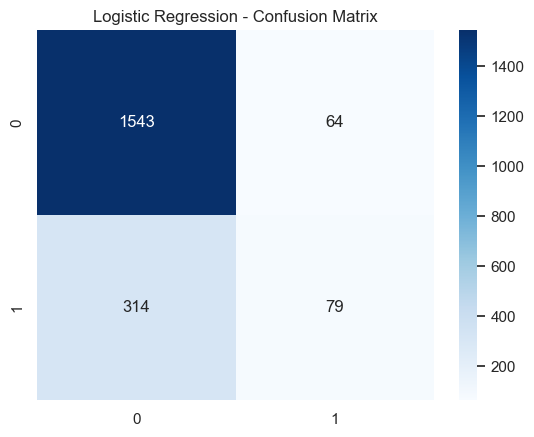

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

### Step 10: Random Forest Classifier (Feature Importance)
Random Forests provide **feature importance**, helping us understand which attributes influence churn.

We train a Random Forest model to extract these insights.

In [32]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

### Step 11: Random Forest Evaluation
We evaluate the model using accuracy and a confusion matrix.

Random Forests usually perform better than linear models in complex datasets.

Accuracy: 0.8675

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1607
         1.0       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



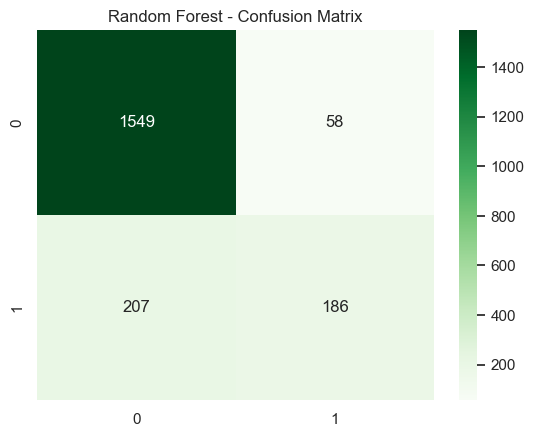

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.show()

### Step 12: Feature Importance
Feature importance helps us understand:

- Which variables contribute most to churn prediction  
- How the bank can design retention strategies  

We visualize the top factors influencing customer churn.

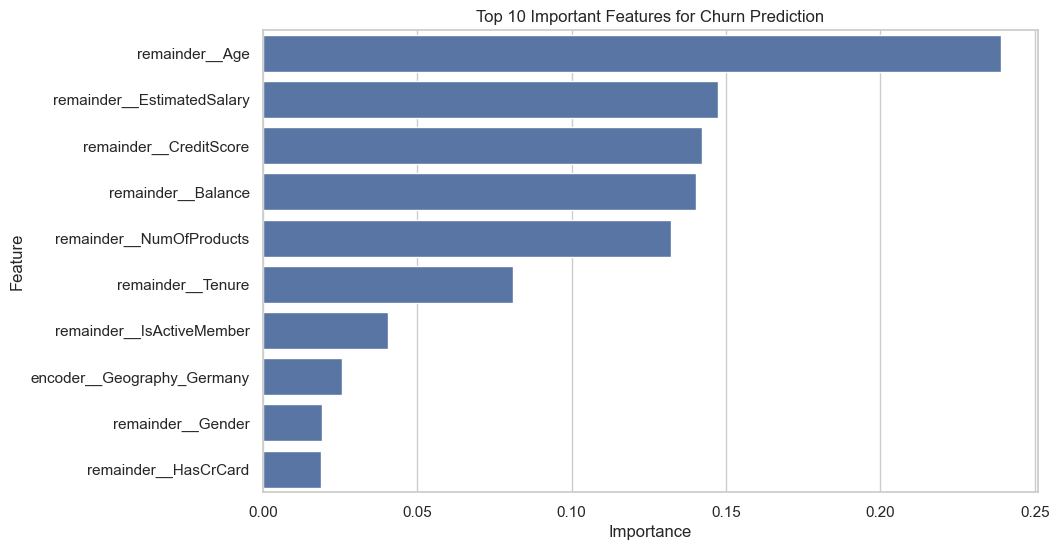

,Feature,Importance
4,remainder__Age,0.239067
10,remainder__EstimatedSalary,0.147336
2,remainder__CreditScore,0.142285
6,remainder__Balance,0.140278
7,remainder__NumOfProducts,0.132237
5,remainder__Tenure,0.081079
9,remainder__IsActiveMember,0.040415
0,encoder__Geography_Germany,0.025692
3,remainder__Gender,0.019229
8,remainder__HasCrCard,0.018887


In [34]:
# Extract feature importance
importances = rf_model.feature_importances_

# Create dataframe for visualization
fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=fi_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()

fi_df.head(10)

### Step 13: Insights and Conclusions
Based on the analysis:

- **Age** strongly influences churn (older customers churn more).  
- **IsActiveMember** is important: inactive customers leave more.  
- **Balance**, **NumOfProducts**, and **CreditScore** also affect churn.  
- Customers in different **geographical regions** show different churn behavior.

These insights can help banks improve customer retention strategies.
